Sources: https://www.brookings.edu/multi-chapter-report/vital-statistics-on-congress/
http://cawp.rutgers.edu/women-us-house-representatives-2019
http://www.cawp.rutgers.edu/women-us-congress-2019
Range of study: 1979-2019

TODO: Still not happy with the donut chart labels.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, savefig

In [2]:
df = pd.read_csv('data/women_congress.csv').replace('.', 0).sort_values(by='Congress')
df['Member'] = pd.to_numeric(df['Member'])
df = df[-84:]

In [3]:
#Senate
women_senate = df.query("Chamber=='Senate'")
women_senate_d = df.query("Chamber=='Senate' & Party=='D'")
women_senate_r = df.query("Chamber=='Senate' & Party=='R'")

#House
women_house = df.query("Chamber=='House'")
women_house_d = df.query("Chamber=='House' & Party=='D'")
women_house_r = df.query("Chamber=='House' & Party=='R'")

Total women members of the House, Democrats: 783
Total women members of the House, Republicans: 324
Total women members of the House: 1107


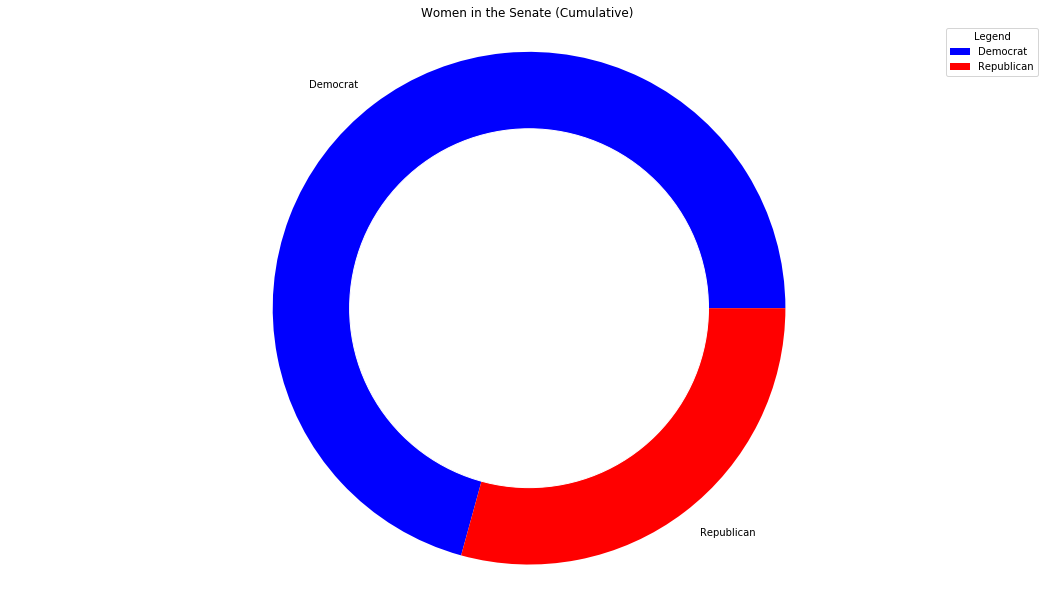

In [21]:
tot_women_house = women_house['Member'].sum()
women_house_per_d = '{0: .0%}'.format(women_house_d['Member'].sum()/tot_women_house)
women_house_per_r = '{0: .0%}'.format(women_house_r['Member'].sum()/tot_women_house)


print('Total women members of the House, Democrats:', women_house_d['Member'].sum())
print('Total women members of the House, Republicans:', women_house_r['Member'].sum())
print('Total women members of the House:', tot_women_house)


pie_data = [women_house_d['Member'].sum(), women_house_r['Member'].sum()]
plt.pie(pie_data, labels=['Democrat', 'Republican'], colors=["Blue", "Red"])
plt.title('Women in the Senate (Cumulative)')
plt.legend(title="Legend")
plt.axis('equal')
inner_circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(inner_circle)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.draw()
fig.savefig('house-donut.png', dpi=100)

Total women members of the Senate, Democrats: 153
Total women members of the Senate, Republicans: 70
Total women members of the Senate: 223


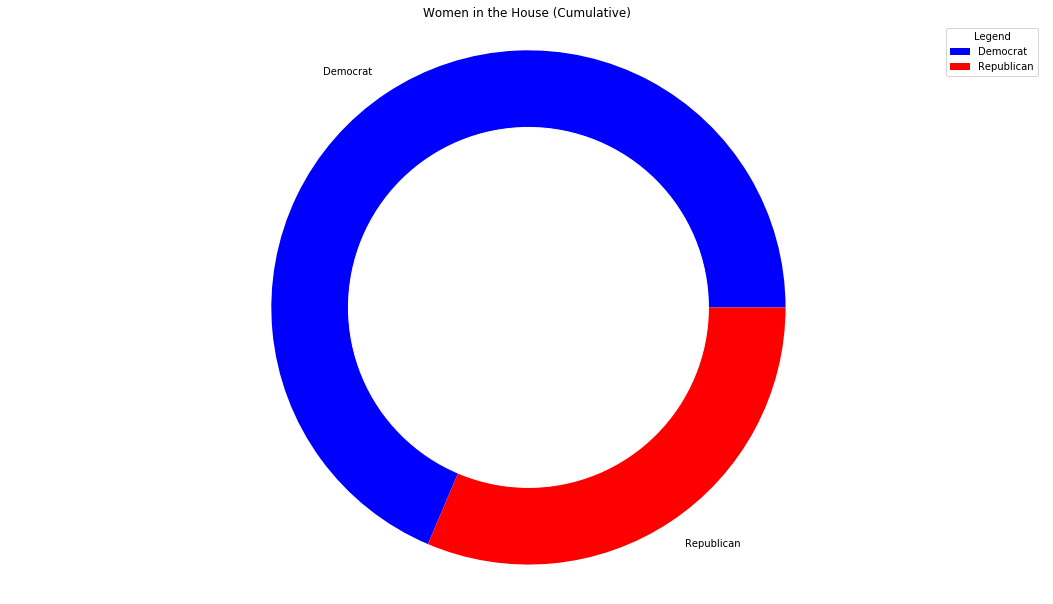

In [23]:
tot_women_senate = women_senate['Member'].sum()
women_senate_per_d = '{0: .0%}'.format(women_senate_d['Member'].sum()/tot_women_senate)
women_senate_per_r = '{0: .0%}'.format(women_senate_r['Member'].sum()/tot_women_senate)

print('Total women members of the Senate, Democrats:', women_senate_d['Member'].sum())
print('Total women members of the Senate, Republicans:', women_senate_r['Member'].sum())
print('Total women members of the Senate:', tot_women_senate)

pie_data = [women_senate_d['Member'].sum(), women_senate_r['Member'].sum()]
plt.pie(pie_data, labels=['Democrat', 'Republican'], colors=["Blue", "Red"])
plt.title('Women in the House (Cumulative)')
plt.axis('equal')
plt.legend(title="Legend")
inner_circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(inner_circle)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.draw()
fig.savefig('senate-donut.png', dpi=100)

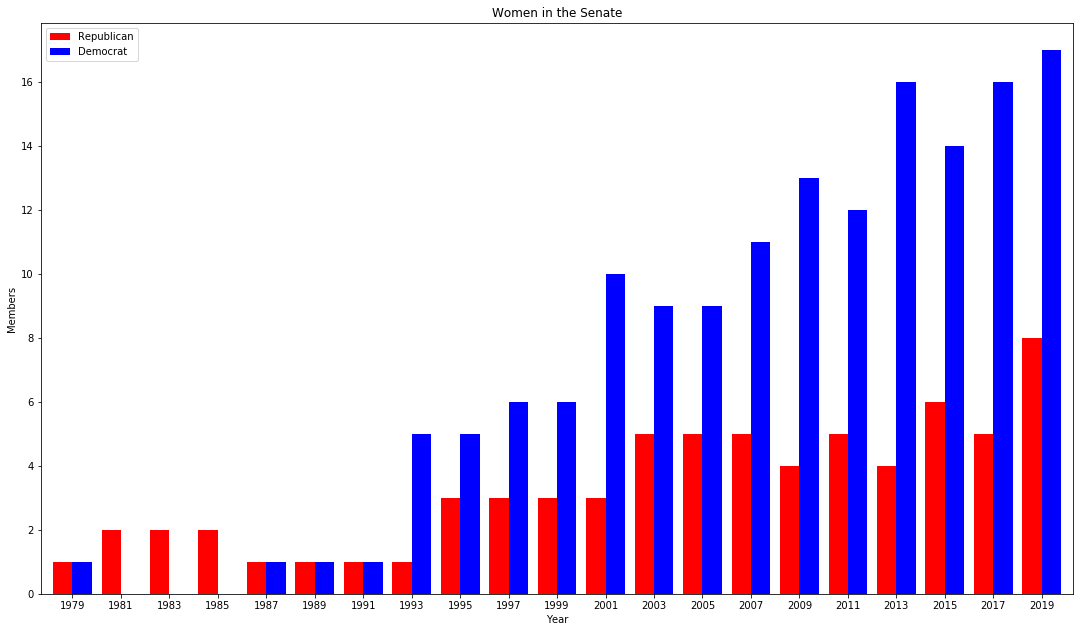

In [8]:
#Senate
times = women_senate_r['Year']
senate_r = pd.Series(women_senate_r['Member'].tolist(), index=times)
senate_d = pd.Series(women_senate_d['Member'].tolist(), index=times)

plot_df = pd.DataFrame({'Republican':senate_r, 'Democrat':senate_d})
_ = plot_df.plot.bar(color=["Red", "Blue"], width=0.8, rot=0, title="Women in the Senate")
_.set_xlabel("Year")
_.set_ylabel("Members")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.draw()
fig.savefig('senate-bar.png', dpi=100)

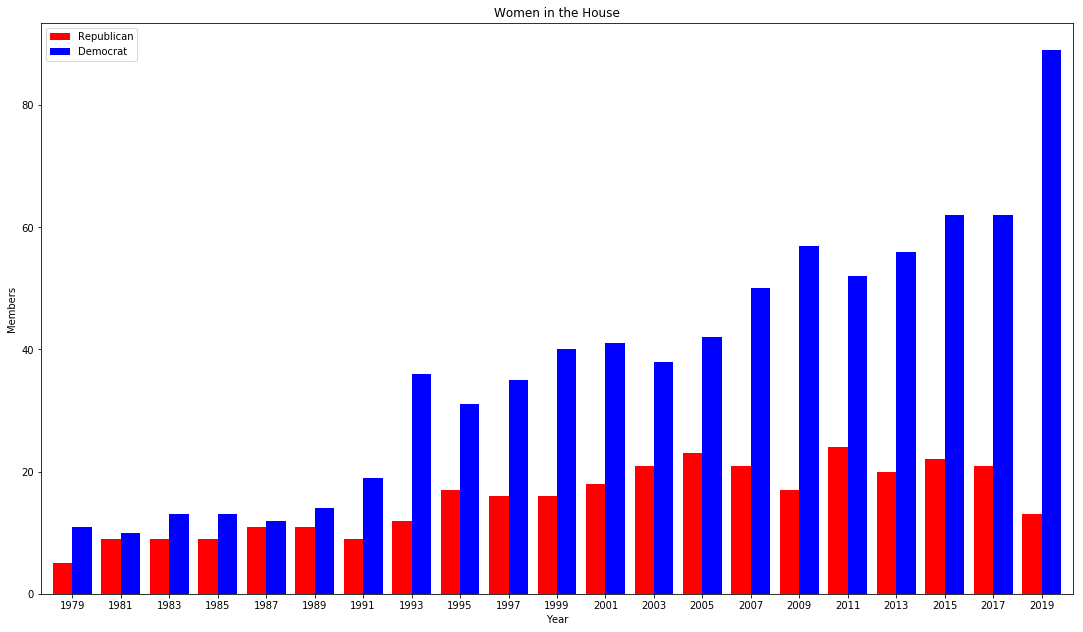

In [9]:
#House
times = women_senate_r['Year']
house_r = pd.Series(women_house_r['Member'].tolist(), index=times)
house_d = pd.Series(women_house_d['Member'].tolist(), index=times)

plot_df = pd.DataFrame({'Republican':house_r, 'Democrat':house_d})
_ = plot_df.plot.bar(color=["Red", "Blue"], width=0.8, rot=0, title="Women in the House")
_.set_xlabel("Year")
_.set_ylabel("Members")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.draw()
fig.savefig('house-bar.png', dpi=100)